#**Police Data Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [143]:
df= pd.read_csv('Police Data.csv')

In [144]:
df1= df.copy()

##Inspecting the data



In [145]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,01-02-2005,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [146]:
df.tail(2)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
65533,12-07-2012,00:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
65534,12-07-2012,00:30,NaN,F,1985.0,27.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [147]:
df.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [148]:
df.shape

(65535, 15)

In [149]:
df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,61481.000000,61228.000000
mean,NaN,1967.791106,34.148984
std,NaN,121.050106,12.760710
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1978.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

##Data Cleaning

In [151]:
df.isnull().any().value_counts() #11 columns contain null values

,count
True,11
False,4


In [152]:
df.isnull().sum()

,0
stop_date,0
stop_time,0
country_name,65535
driver_gender,4061
driver_age_raw,4054
driver_age,4307
driver_race,4060
violation_raw,4060
violation,4060
search_conducted,0


In [154]:
#% OF NULL VALUES
total_cells= df.shape[0]* df.shape[1] #Multiply no. of rows(.shape[0]) with columns(df.shape[1])
null_values=df.isnull().sum().sum()
null_value_percent= (null_values/total_cells)*100
print('Total null value percent is',null_value_percent)

Total null value percent is 16.822868187482516


In [155]:
df.drop(columns='country_name' , inplace= True)

In [156]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,01-02-2005,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12-06-2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12-06-2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12-06-2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12-07-2012,00:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [157]:
df['stop_date'].value_counts()

,count
stop_date,
01-11-2012,69
2/28/2012,65
5/16/2007,62
01-02-2012,61
01-10-2007,60
...,...
9/29/2005,1
12/25/2005,1
1/18/2005,1


##Data pre-processing

In [158]:
df['stop_date']=pd.to_datetime(df['stop_date'],format= '%m/%d/%Y',errors='coerce') #convert to datetime from object

In [159]:
df['stop_time']=pd.to_datetime(df['stop_time'],format='%H:%M').dt.time #convert to datetime from object

In [160]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,NaT,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,NaT,17:54:00,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,NaT,22:22:00,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,NaT,23:20:00,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,NaT,00:23:00,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


##Does gender affect who gets searched during a stop ?

In [19]:
df['search_conducted'].value_counts()

,count
search_conducted,
False,63056
True,2479


In [20]:
df.groupby('driver_gender').search_conducted.sum()

,search_conducted
driver_gender,
F,366
M,2113


In [21]:
(366/2479) *100  #14.7 % Females were searched

14.764017749092377

In [22]:
(2113/2479) *100  #85.2 % Males were searched

85.23598225090763

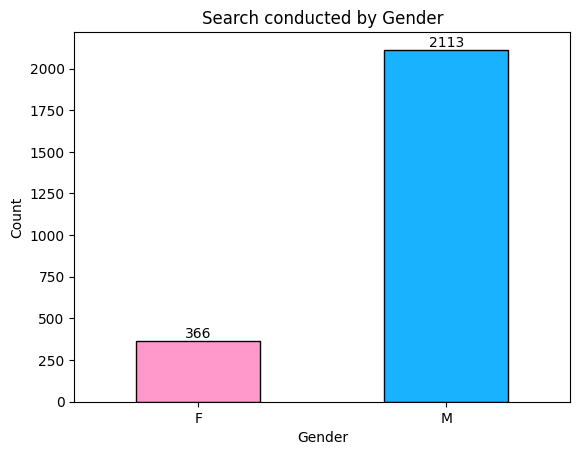

In [23]:
#Search conducted by Gender
search_by_gender=df.groupby('driver_gender').search_conducted.sum()

ax=search_by_gender.plot(kind='bar',color=('#FF99CC','#19B2FF'),edgecolor='black')
plt.title('Search conducted by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

ax.bar_label(ax.containers[0])#ax is Axes object which gives more control over graph customisation.

plt.xticks(rotation=0)
plt.show()

##Gender and Race Distribution

In [104]:
df['driver_race'].value_counts()

,count
driver_race,
White,45747
Black,8267
Hispanic,5611
Asian,1639
Other,211


In [100]:
df['driver_race'].value_counts().sum()  #Non- null values

61475

In [102]:
len(df['driver_race'])  #Including null values

65535

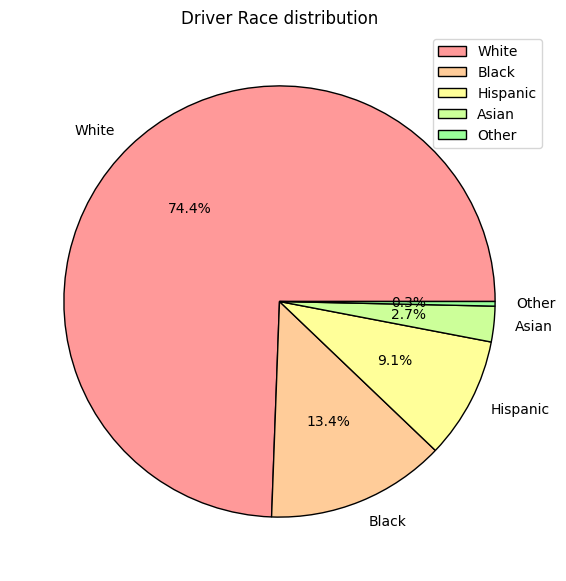

In [96]:
race=df['driver_race'].value_counts()

plt.figure(figsize=(7,7))
colors=['#FF9999','#FFCC99','#FFFF99','#CCFF99','#99FF99' ]

plt.pie(race,labels=race.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}, colors=colors)
plt.title('Driver Race distribution', loc='center')
plt.legend(loc='upper right')
plt.show()

In [26]:
df['driver_gender'].value_counts()

,count
driver_gender,
M,45164
F,16310


In [27]:
df.groupby('driver_gender').driver_race.value_counts()

driver_gender  driver_race
F              White          13273
               Black           1634
               Hispanic        1014
               Asian            366
               Other             23
M              White          32473
               Black           6633
               Hispanic        4597
               Asian           1273
               Other            188
Name: count, dtype: int64

In [28]:
df.groupby('driver_gender').driver_race.value_counts().sort_values(ascending=False)

driver_gender  driver_race
M              White          32473
F              White          13273
M              Black           6633
               Hispanic        4597
F              Black           1634
M              Asian           1273
F              Hispanic        1014
               Asian            366
M              Other            188
F              Other             23
Name: count, dtype: int64

##Show records related to race being Asian and Hispanic

In [161]:
df[df['driver_race'].isin(['Asian','Hispanic'])].head(4)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
10,2005-07-13,16:20:00,M,1979.0,26.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
20,2005-07-28,12:37:00,F,1979.0,26.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
37,2005-09-30,14:00:00,M,1962.0,43.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
42,NaT,00:50:00,M,1977.0,28.0,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,30+ Min,False


##Records where Male drivers are Asian or Hispanic

In [162]:
df[df['driver_race'].isin(['Asian','Hispanic'])&(df['driver_gender']=='M')]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
10,2005-07-13,16:20:00,M,1979.0,26.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
37,2005-09-30,14:00:00,M,1962.0,43.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
42,NaT,00:50:00,M,1977.0,28.0,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,30+ Min,False
67,NaT,23:25:00,M,1974.0,31.0,Asian,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False
141,NaT,01:55:00,M,1958.0,47.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65504,NaT,00:19:00,M,1982.0,30.0,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
65506,NaT,05:51:00,M,1986.0,26.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65511,NaT,08:45:00,M,1964.0,48.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65514,NaT,10:37:00,M,1988.0,24.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False


##For speeding, were men or women stopped more?

In [163]:
df[df['violation']== 'Speeding'].driver_gender.value_counts()

,count
driver_gender,
M,25517
F,11686


##Violation by Race

In [164]:
df.groupby('driver_race').violation.value_counts()

driver_race  violation          
Asian        Speeding                1173
             Moving violation         242
             Equipment                130
             Other                     65
             Registration/plates       29
Black        Speeding                3658
             Moving violation        2076
             Equipment               1262
             Other                    767
             Registration/plates      503
             Seat belt                  1
Hispanic     Speeding                2062
             Moving violation        1543
             Equipment               1069
             Other                    469
             Registration/plates      467
             Seat belt                  1
Other        Speeding                 125
             Moving violation          49
             Other                     21
             Equipment                 15
             Registration/plates        1
White        Speeding               30186
             Moving violation        8016
             Equipment               4040
             Other                   2261
             Registration/plates     1243
             Seat belt                  1
Name: count, dtype: int64

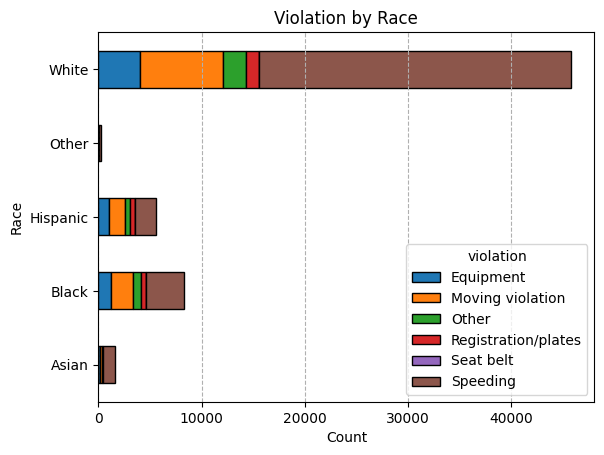

In [174]:
violation_by_race=df.groupby(['driver_race','violation']).size().unstack(fill_value=0)

violation_by_race.plot(kind='barh',stacked=True,edgecolor='black')
plt.title('Violation by Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.grid(axis='x',linestyle='--')
plt.show()

##What is the mean stop_duration?

In [33]:
df['stop_duration'].value_counts()

,count
stop_duration,
0-15 Min,47379
16-30 Min,11448
30+ Min,2647
2,1


In [34]:
df['stop_duration']=df['stop_duration'].map({'0-15 Min' : 7.5, '16-30 Min': 24 ,'30+ Min': 45 })#Taking the mean

In [35]:
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,NaT,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [36]:
df['stop_duration'].mean()

12.187420698181345

##Compare the age distribution for each violation

In [37]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


**Count**: The highest count of violation is 'Speeding'.
'Seatbelt' violation has the smallest sample size of only 3.


**Mean**:Highest mean age(40.36 years)is for "Other" violation,
 while "Equipment" violations have the lowest (31.68 years).


**Standard Deviation**:(Shows how much the ages vary from the mean)
Age variability is highest in "Moving" violation.


**Median(50%)**: The median age for "Other" violations is the highest at 41 years and lowest for "Seatbelt" violation 26.


**Min**: The youngest age recorded in the dataset is 15 for 'moving violation' as well as 'Speeding'


**Max**:The highest age was recorded for 'Speeding' at 88 years.

In [38]:
age_by_violation=df.groupby('violation').driver_age.describe()

In [39]:
df.groupby('violation').driver_age.value_counts()


violation  driver_age
Equipment  23.0          385
           21.0          374
           22.0          370
           20.0          348
           24.0          329
                        ... 
Speeding   84.0            3
           86.0            3
           88.0            2
           15.0            1
           83.0            1
Name: count, Length: 333, dtype: int64

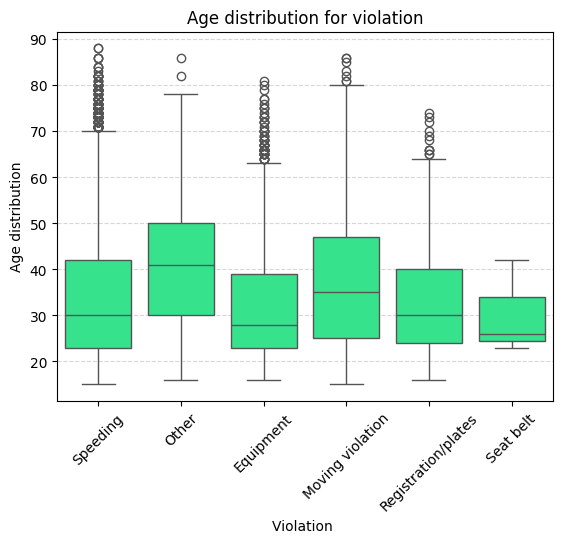

In [40]:
#Age distribution for violation Box plot
sns.boxplot(x='violation', y='driver_age' , data=df,color='#19FF8C')

plt.title('Age distribution for violation')
plt.xlabel('Violation ')
plt.ylabel('Age distribution')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Speeding**: Involves all ages, with a lot of older drivers showing up as outliers. Median age around 30.


**Other violations**: Mostly older drivers, with the highest median age (about 41) and widest age spread.

**Equipment & Registration/Plates**: Mainly younger drivers, with typical ages around 28-30.

**Moving Violation**: Ages vary widely, median around 35, with some older outliers.

**Seatbelt**: Very few cases, mostly younger drivers, median around 26.


Older drivers are mostly in "Other" and "Speeding" , while younger drivers are more in "Equipment" and "Registration" violations.

In [41]:
df['driver_age'].min()

15.0

In [42]:
df['driver_age'].max()

88.0

In [175]:
df['driver_age'].describe()

,driver_age
count,61228.000000
mean,34.148984
std,12.760710
min,15.000000
25%,23.000000
50%,31.000000
75%,43.000000
max,88.000000


## 5 Most common violations

In [43]:
df.violation.value_counts().head(5) #speeding is the most common

,count
violation,
Speeding,37204
Moving violation,11926
Equipment,6516
Other,3583
Registration/plates,2243


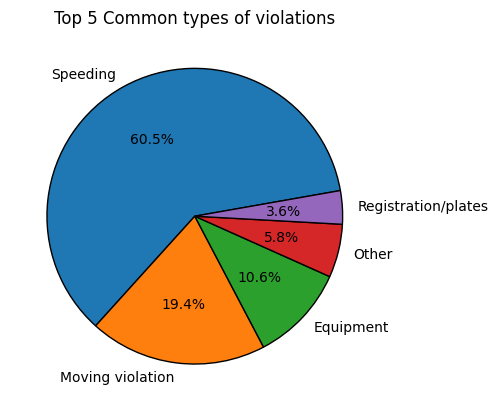

In [44]:
plt.pie(df.violation.value_counts()[:5],labels= df.violation.value_counts().index[:5],autopct='%1.1f%%',startangle=10,
        wedgeprops={'linewidth':1.0,'edgecolor':'black'})
plt.title('Top 5 Common types of violations', loc='center')
plt.show()

In [45]:
df.violation_raw.value_counts()#Violations in detail

,count
violation_raw,
Speeding,37204
Other Traffic Violation,11926
Equipment/Inspection Violation,6516
Special Detail/Directed Patrol,2383
Registration Violation,2243
Call for Service,793
Violation of City/Town Ordinance,170
Motorist Assist/Courtesy,138
APB,51


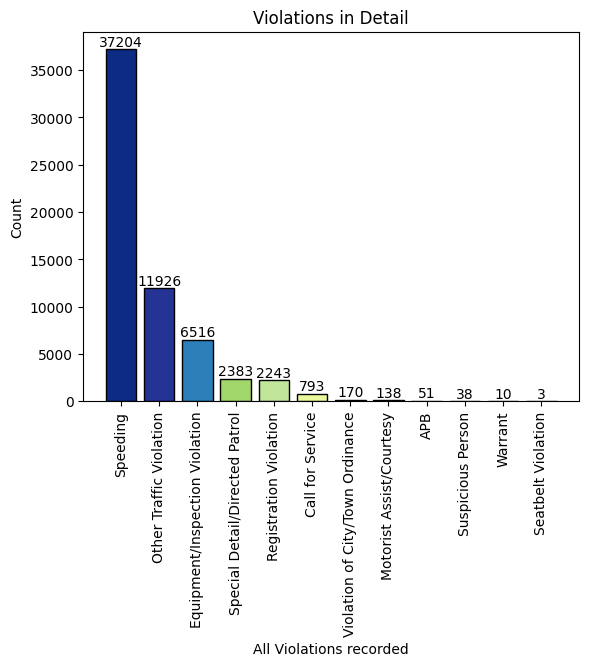

In [46]:
#Violation Raw (Violations in Detail)
violation_raw_bar=df['violation_raw'].value_counts()
plt.bar(df.violation_raw.value_counts().keys(),df.violation_raw.value_counts(),edgecolor='black',
        color=['#0C2C84','#253494','#2C7FB8', '#A1D76A', '#C2E699', '#E9F99B'])

for index , value in enumerate(violation_raw_bar):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Violations in Detail', loc='center')
plt.xlabel('All Violations recorded')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##drugs_related_stop

In [47]:
df[df['drugs_related_stop']]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
40,NaT,00:00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,24.0,True
41,NaT,00:00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,45.0,True
118,NaT,01:20:00,M,1956.0,49.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,45.0,True
139,NaT,00:20:00,M,1980.0,25.0,Black,Equipment/Inspection Violation,Equipment,True,"Probable Cause,Reasonable Suspicion",Arrest Driver,True,24.0,True
219,NaT,23:30:00,M,1986.0,19.0,White,Suspicious Person,Other,True,Probable Cause,Arrest Passenger,True,24.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64858,NaT,22:45:00,M,1988.0,24.0,Black,Speeding,Speeding,True,Reasonable Suspicion,Citation,False,24.0,True
65033,2012-11-16,15:43:00,M,1985.0,27.0,White,Speeding,Speeding,True,Probable Cause,Citation,False,24.0,True
65219,2012-11-23,20:03:00,M,1979.0,33.0,Black,Equipment/Inspection Violation,Equipment,True,"Incident to Arrest,Probable Cause",Arrest Driver,True,45.0,True
65408,2012-11-30,22:37:00,F,1986.0,26.0,Hispanic,Speeding,Speeding,True,Reasonable Suspicion,Citation,False,45.0,True


In [48]:
df.drugs_related_stop.value_counts()

,count
drugs_related_stop,
False,65017
True,518


In [49]:
#drugs_related_stop according to driver gender
df.groupby('driver_gender').drugs_related_stop.value_counts()

driver_gender  drugs_related_stop
F              False                 16254
               True                     56
M              False                 44702
               True                    462
Name: count, dtype: int64

In [50]:
#Minors who were found with stopped for relation to drugs
df[(df['driver_age']<18) & (df['drugs_related_stop'] == True)]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
40,NaT,00:00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,24.0,True
41,NaT,00:00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,45.0,True
21981,NaT,00:01:00,M,1991.0,16.0,Black,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Citation,False,45.0,True
37174,NaT,00:40:00,M,1992.0,17.0,White,Other Traffic Violation,Moving violation,True,Probable Cause,Citation,False,7.5,True
46315,2010-11-27,00:56:00,M,1993.0,17.0,Black,Other Traffic Violation,Moving violation,True,Probable Cause,Citation,False,7.5,True


##Minors driving

In [51]:
minor=df[df['driver_age']<18] #488 minors recorded in dataset

In [52]:
minor.violation.value_counts() #Most common violation by a minor is Speeding

,count
violation,
Speeding,357
Moving violation,73
Equipment,36
Registration/plates,13
Other,9


In [53]:
minor.is_arrested.value_counts() #12 minors were arrested

,count
is_arrested,
False,476
True,12


In [54]:
minor.stop_outcome.value_counts()

,count
stop_outcome,
Citation,453
Warning,19
Arrest Driver,11
No Action,2
N/D,2
Arrest Passenger,1


In [55]:
minor.stop_duration.mean()

11.781762295081966

In [56]:
minor[minor.driver_gender == 'F']  #records where minors were Females

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
276,NaT,09:10:00,F,1988.0,17.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,7.5,False
597,2005-10-23,16:03:00,F,1988.0,17.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
642,2005-10-24,19:53:00,F,1988.0,17.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
898,NaT,23:40:00,F,1988.0,17.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
950,NaT,01:50:00,F,1988.0,17.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,24.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61787,NaT,22:53:00,F,1995.0,17.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
62592,NaT,14:51:00,F,1995.0,17.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,7.5,False
63005,2012-08-22,10:21:00,F,1995.0,17.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
63747,2012-09-16,09:30:00,F,1995.0,17.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,7.5,False


##What percentage of times is search conducted?

In [57]:
search_conducted_percent= df['search_conducted'].value_counts()

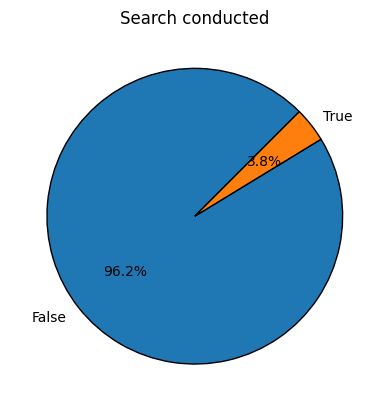

In [58]:
plt.title('Search conducted')
plt.pie(search_conducted_percent,labels=search_conducted_percent.index,autopct='%0.1f%%',
        startangle=45, wedgeprops={'edgecolor':'black'})
plt.show()

##Search conducted and stop outcome

In [59]:
df.groupby('search_conducted').stop_outcome.value_counts()

search_conducted  stop_outcome    
False             Citation            55154
                  Warning              1852
                  Arrest Driver        1162
                  N/D                   407
                  No Action             291
                  Arrest Passenger      130
True              Citation             1410
                  Arrest Driver         847
                  Arrest Passenger      121
                  No Action              48
                  Warning                37
                  N/D                    16
Name: count, dtype: int64

##Stop duration and violation

In [60]:
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,NaT,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [61]:
df.groupby('violation').stop_duration.value_counts()

violation            stop_duration
Equipment            7.5               5051
                     24.0              1115
                     45.0               350
Moving violation     7.5               8047
                     24.0              2748
                     45.0              1130
Other                7.5               2095
                     24.0               999
                     45.0               489
Registration/plates  7.5               1349
                     24.0               715
                     45.0               179
Seat belt            7.5                  3
Speeding             7.5              30834
                     24.0              5871
                     45.0               499
Name: count, dtype: int64

##Stop duration and stop outcome

In [62]:
df.groupby('stop_outcome').stop_duration.value_counts()

stop_outcome      stop_duration
Arrest Driver     24.0               930
                  45.0               634
                  7.5                445
Arrest Passenger  24.0               114
                  45.0                87
                  7.5                 49
Citation          7.5              44594
                  24.0             10104
                  45.0              1866
N/D               7.5                368
                  24.0                48
                  45.0                 7
No Action         7.5                204
                  24.0                97
                  45.0                38
Warning           7.5               1719
                  24.0               155
                  45.0                15
Name: count, dtype: int64

##Arrests and Non Arrests Stop Outcomes

In [63]:
df.stop_outcome.value_counts()

,count
stop_outcome,
Citation,56564
Arrest Driver,2009
Warning,1889
N/D,423
No Action,339
Arrest Passenger,251


In [64]:
df.is_arrested.value_counts()

,count
is_arrested,
False,59215
True,2260


In [65]:
 df[df['is_arrested']==True].stop_outcome.value_counts()

,count
stop_outcome,
Arrest Driver,2009
Arrest Passenger,251


In [66]:
arrested = df[df['is_arrested']==True].stop_outcome.value_counts()

In [67]:
df[df['is_arrested']==False].stop_outcome.value_counts()

,count
stop_outcome,
Citation,56564
Warning,1889
N/D,423
No Action,339


In [68]:
not_arrested=df[df['is_arrested']==False].stop_outcome.value_counts()

In [69]:
df[df['is_arrested']==False].stop_outcome.value_counts()

,count
stop_outcome,
Citation,56564
Warning,1889
N/D,423
No Action,339


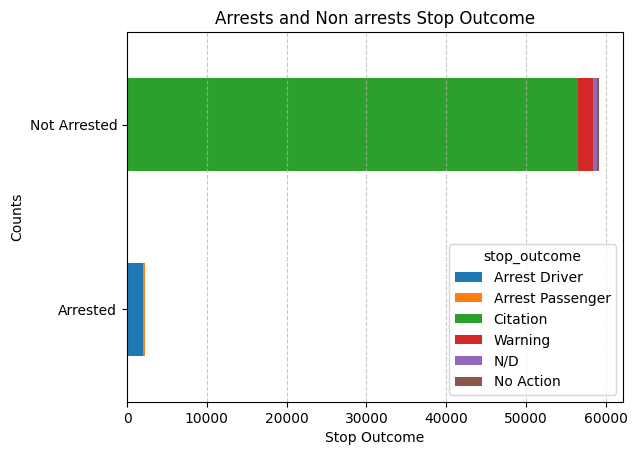

In [70]:
arrests_and_non_arrests=pd.DataFrame([arrested,not_arrested])

arrests_and_non_arrests.plot(kind='barh', stacked=True)
plt.title('Arrests and Non arrests Stop Outcome')
plt.xlabel('Stop Outcome')
plt.yticks([0,1],['Arrested','Not Arrested'])
plt.ylabel('Counts')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

 ## Stop Outcomes by Violation Type

In [71]:
df.groupby('violation').stop_outcome.value_counts()

violation            stop_outcome    
Equipment            Citation             5088
                     Warning               591
                     Arrest Driver         362
                     N/D                   327
                     Arrest Passenger      108
                     No Action              40
Moving violation     Citation            10644
                     Arrest Driver         643
                     Warning               498
                     Arrest Passenger       67
                     No Action              45
                     N/D                    29
Other                Citation             3071
                     Arrest Driver         248
                     No Action             216
                     Warning                31
                     N/D                     9
                     Arrest Passenger        8
Registration/plates  Citation             1888
                     Arrest Driver         252
                     Warning                50
                     Arrest Passenger       24
                     N/D                    15
                     No Action              14
Seat belt            Citation                3
Speeding             Citation            35870
                     Warning               719
                     Arrest Driver         504
                     Arrest Passenger       44
                     N/D                    43
                     No Action              24
Name: count, dtype: int64

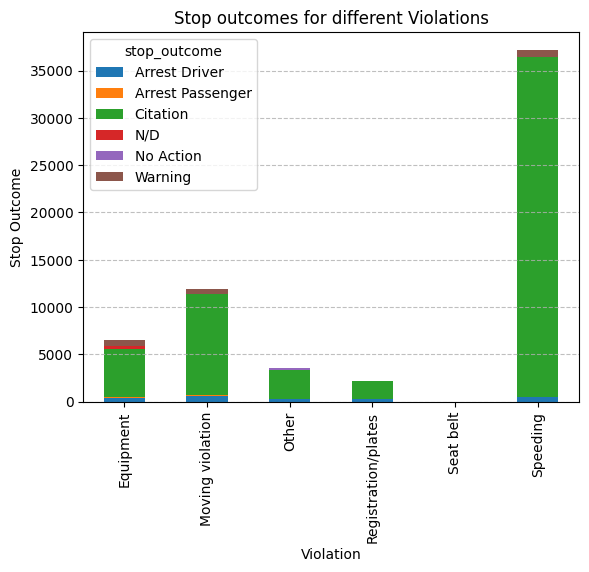

In [106]:
stop_outcome_by_violation=df.groupby(['violation','stop_outcome']).size().unstack(fill_value=0) #2nd col will be unstacked made into column

stop_outcome_by_violation.plot(kind='bar',stacked=True)
plt.title('Stop outcomes for different Violations')
plt.xlabel('Violation')
plt.ylabel('Stop Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

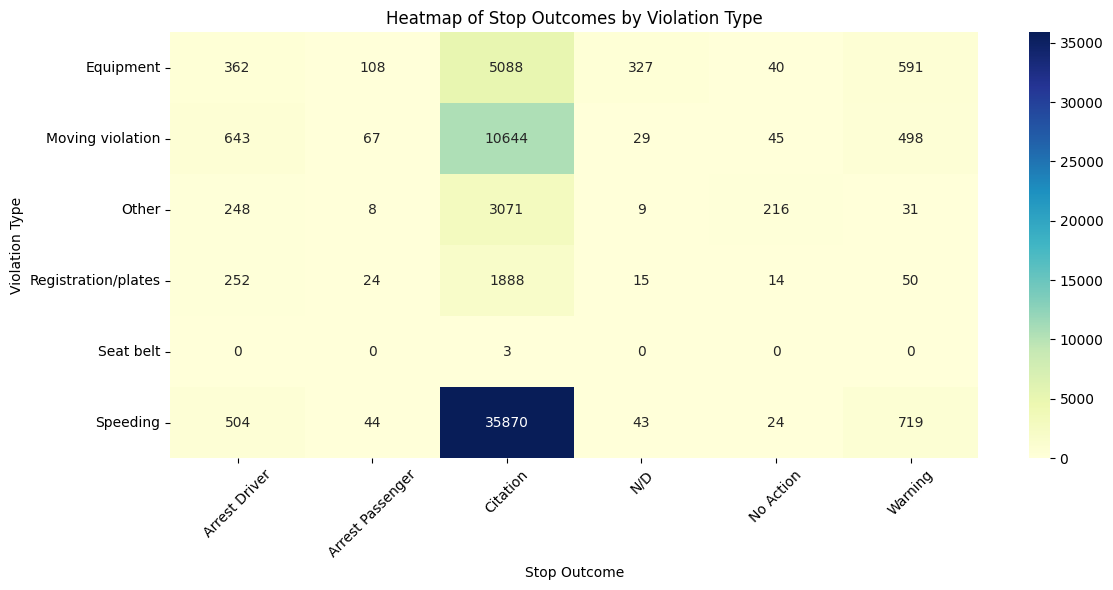

In [73]:
pivot_df = df.groupby(['violation', 'stop_outcome']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Stop Outcomes by Violation Type')
plt.xlabel('Stop Outcome')
plt.ylabel('Violation Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Groupby two columns, order values in asc and desc

In [79]:
df.sort_values(by=['driver_age_cat','stop_duration'],ascending=[True, False]).groupby(['driver_age_cat','stop_duration']).size()

<ipython-input-79-5f97d39d35c9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.sort_values(by=['driver_age_cat','stop_duration'],ascending=[True, False]).groupby(['driver_age_cat','stop_duration']).size()


driver_age_cat  stop_duration
Minor           7.5               1452
                24.0               323
                45.0                57
Young Adults    7.5              22021
                24.0              5253
                45.0               975
Adults          7.5              21747
                24.0              5384
                45.0              1494
Seniors         7.5               1983
                24.0               417
                45.0               116
dtype: int64

In [80]:
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_cat
0,NaT,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Young Adults
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults


##Date-Based Analysis

In [81]:
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_cat
0,NaT,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Young Adults
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults


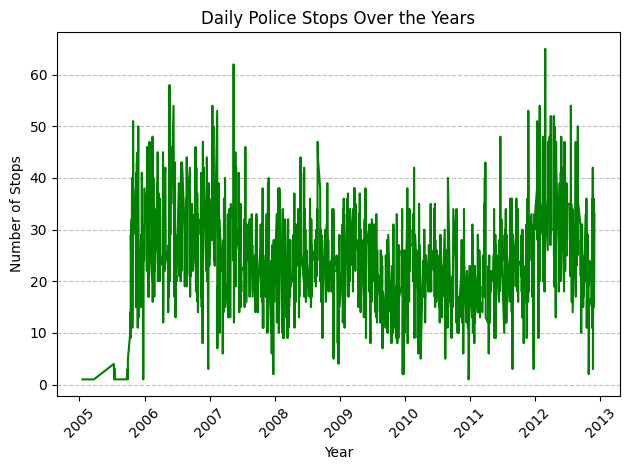

In [82]:
#Line chart: Daily Police Stops Over the Years
df['stop_date'] = pd.to_datetime(df['stop_date'])
stops_over_years= df['stop_date'].value_counts().sort_index() # Counts stops by unique dates, then sort by date
df['year'] = df['stop_date'].dt.year

plt.plot(stops_over_years.index, stops_over_years.values, color='g')

plt.title('Daily Police Stops Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Stops')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

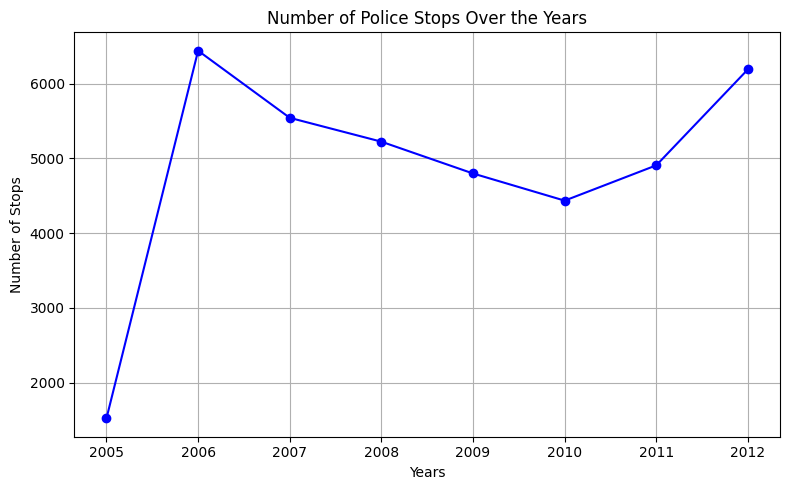

In [83]:
#Line chart of number of Stops over the Years.
df['stop_date']=pd.to_datetime(df['stop_date'])
df['year']=df['stop_date'].dt.year

yearly_stops= df['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.plot(yearly_stops.index,yearly_stops.values, marker='o',color='blue')

plt.title('Number of Police Stops Over the Years')
plt.xlabel('Years')
plt.ylabel('Number of Stops')
plt.tight_layout()
plt.grid(True)
plt.show()

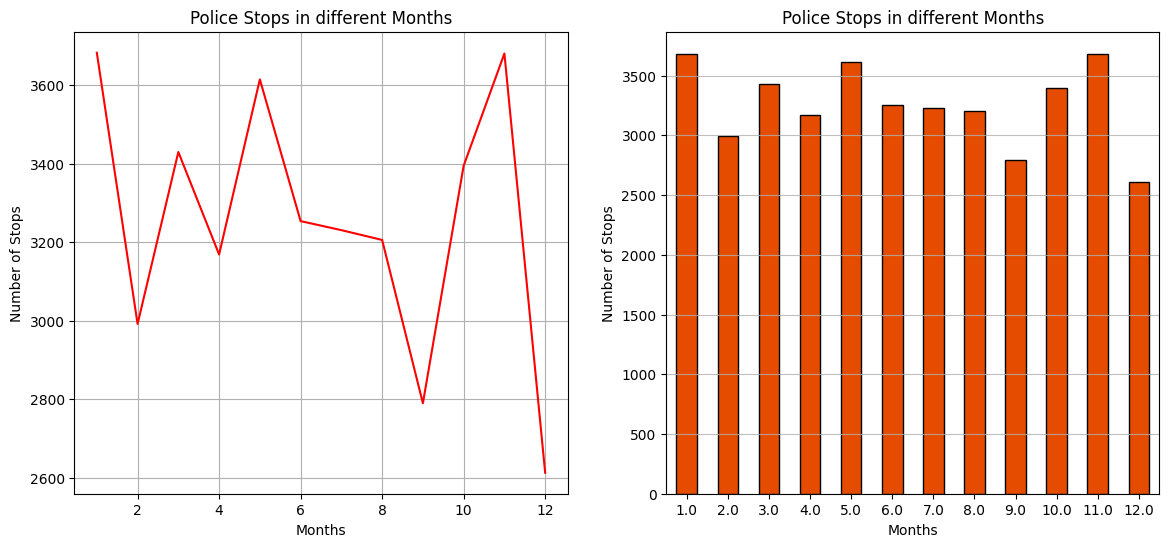

In [84]:
#Months with most Police stops
df['stop_date']=pd.to_datetime(df['stop_date'])
df['Month']=df['stop_date'].dt.month

month_stopped= df['Month'].value_counts().sort_index()

plt.figure(figsize=(14,6))

#Line chart- Police Stops in different Months
plt.subplot(1,2,1)
plt.plot(month_stopped.index, month_stopped.values, color='red')
plt.title('Police Stops in different Months')
plt.xlabel('Months')
plt.ylabel('Number of Stops')
plt.grid(True)

#Barchart -Police Stops in different Months
plt.subplot(1,2,2)
month_stopped.plot(kind='bar',color='#E64C00',edgecolor='black')
plt.title('Police Stops in different Months')
plt.grid(axis='y',linestyle='-',alpha=0.8)
plt.xticks(rotation=0)
plt.xlabel('Months')
plt.ylabel('Number of Stops')

#use these once in the end
plt.show()


##Driver age distribution

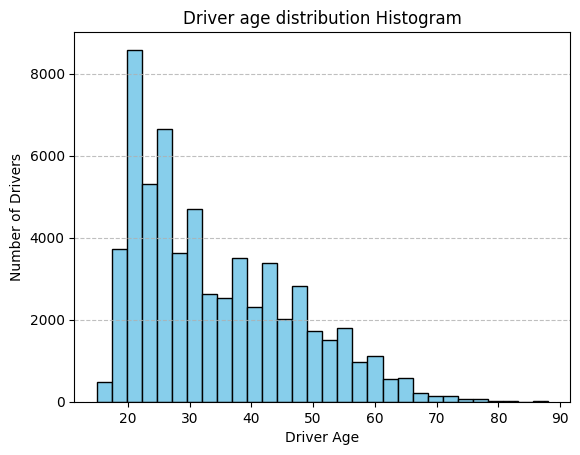

In [85]:
#Driver age distribution Histogram
plt.hist(df['driver_age'],bins=30,color='skyblue', edgecolor='black')
plt.title('Driver age distribution Histogram')
plt.xlabel('Driver Age')
plt.ylabel('Number of Drivers')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

##Driver age categories

In [75]:
#Categorize ages into age_categories
age_bins=[15,19,31,60,89]
age_labels=['Minor','Young Adults','Adults', 'Seniors']

df['driver_age_cat']=pd.cut(df['driver_age'],bins= age_bins, labels= age_labels, right=False)
    #right=False ensures that right boundary of next bin is not included in that bin like 15,19 will be 15 to 18 , 19 to next

print(df[['driver_age','driver_age_cat']].tail())

       driver_age driver_age_cat
65530        25.0   Young Adults
65531        58.0         Adults
65532        27.0   Young Adults
65533         NaN            NaN
65534        27.0   Young Adults


In [76]:
df.groupby('driver_age_cat')['driver_age'].value_counts()

<ipython-input-76-e8d7caf43e92>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('driver_age_cat')['driver_age'].value_counts()


driver_age_cat  driver_age
Minor           18.0          1345
                17.0           449
                16.0            34
                15.0             5
                19.0             0
                              ... 
Seniors         55.0             0
                56.0             0
                57.0             0
                58.0             0
                59.0             0
Name: count, Length: 292, dtype: int64

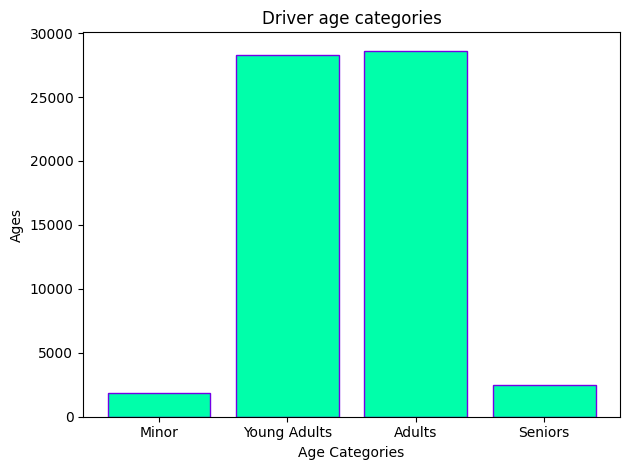

In [77]:
#Driver age categories bar chart
age_cat_counts = df['driver_age_cat'].value_counts().sort_index()

plt.bar(age_cat_counts.index,age_cat_counts.values, edgecolor='#7300E6',color='#00FFAA')

plt.title('Driver age categories')
plt.xlabel('Age Categories')
plt.ylabel('Ages')
plt.tight_layout()

plt.show()

In [78]:
#Driver age category by violation in detail
df.groupby(['driver_age_cat','violation_raw']).size()

<ipython-input-78-c77f5e3d3305>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['driver_age_cat','violation_raw']).size()


driver_age_cat  violation_raw                   
Minor           APB                                     1
                Call for Service                       23
                Equipment/Inspection Violation        166
                Motorist Assist/Courtesy                4
                Other Traffic Violation               243
                Registration Violation                 51
                Seatbelt Violation                      0
                Special Detail/Directed Patrol          3
                Speeding                             1337
                Suspicious Person                       1
                Violation of City/Town Ordinance        3
                Warrant                                 0
Young Adults    APB                                    17
                Call for Service                      387
                Equipment/Inspection Violation       3553
                Motorist Assist/Courtesy               55
                Other Traffic Violation              4558
                Registration Violation               1125
                Seatbelt Violation                      2
                Special Detail/Directed Patrol        344
                Speeding                            18110
                Suspicious Person                      20
                Violation of City/Town Ordinance       72
                Warrant                                 6
Adults          APB                                    31
                Call for Service                      342
                Equipment/Inspection Violation       2633
                Motorist Assist/Courtesy               63
                Other Traffic Violation              6404
                Registration Violation               1029
                Seatbelt Violation                      1
                Special Detail/Directed Patrol       1755
                Speeding                            16261
                Suspicious Person                      13
                Violation of City/Town Ordinance       91
                Warrant                                 3
Seniors         APB                                     1
                Call for Service                       34
                Equipment/Inspection Violation        155
                Motorist Assist/Courtesy                5
                Other Traffic Violation               671
                Registration Violation                 35
                Seatbelt Violation                      0
                Special Detail/Directed Patrol        196
                Speeding                             1412
                Suspicious Person                       2
                Violation of City/Town Ordinance        4
                Warrant                                 1
dtype: int64

##Top 5 Search Types

In [86]:
df['search_type'].value_counts()

,count
search_type,
Incident to Arrest,1074
Probable Cause,579
Inventory,173
Reasonable Suspicion,149
Protective Frisk,126
"Incident to Arrest,Inventory",104
"Incident to Arrest,Probable Cause",79
"Probable Cause,Reasonable Suspicion",38
"Incident to Arrest,Protective Frisk",31


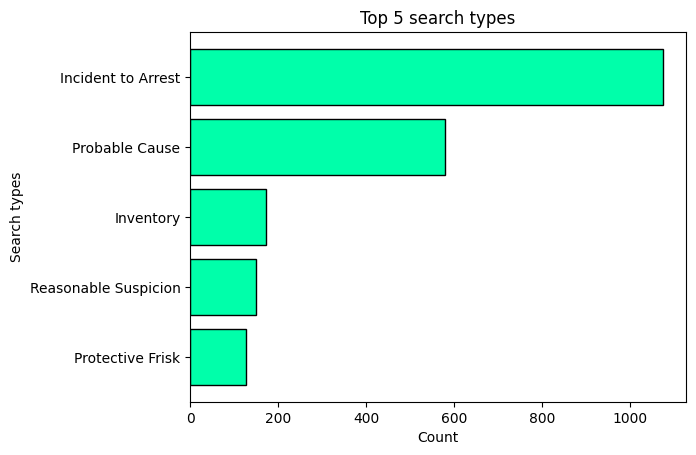

In [87]:
top_5_search_types=df['search_type'].value_counts().head(5)

plt.barh(top_5_search_types.index[::-1],top_5_search_types.values[::-1],color='#00FFAA',edgecolor='black')
plt.title('Top 5 search types')
plt.xlabel('Count')
plt.ylabel('Search types')

plt.show()

In [88]:
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_cat,year,Month
0,NaT,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Young Adults,NaN,NaN
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults,2005.0,1.0
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults,2005.0,1.0


##Citation in the year 2010

In [89]:
df['stop_date']=pd.to_datetime(df['stop_date'])
df[(df['stop_date'].dt.year==2010)&(df['stop_outcome']=='Citation')]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_cat,year,Month
39595,2010-01-13,00:12:00,F,1983.0,27.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,24.0,False,Young Adults,2010.0,1.0
39596,2010-01-13,00:16:00,M,1990.0,20.0,White,Equipment/Inspection Violation,Equipment,True,"Incident to Arrest,Probable Cause,Protective F...",Citation,False,45.0,True,Young Adults,2010.0,1.0
39597,2010-01-13,00:28:00,M,1986.0,24.0,White,Registration Violation,Registration/plates,False,NaN,Citation,False,7.5,False,Young Adults,2010.0,1.0
39598,2010-01-13,00:59:00,M,1969.0,41.0,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Citation,False,7.5,False,Adults,2010.0,1.0
39600,2010-01-13,08:14:00,M,1953.0,57.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults,2010.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46888,2010-12-31,15:41:00,F,1987.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Young Adults,2010.0,12.0
46889,2010-12-31,16:55:00,F,1967.0,43.0,Black,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults,2010.0,12.0
46890,2010-12-31,19:34:00,F,1989.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Young Adults,2010.0,12.0
46892,2010-12-31,21:53:00,F,1984.0,26.0,Black,Speeding,Speeding,False,NaN,Citation,False,24.0,False,Young Adults,2010.0,12.0


In [90]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_cat,year,Month
0,NaT,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Young Adults,NaN,NaN
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults,2005.0,1.0
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Adults,2005.0,1.0
3,2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,24.0,False,Young Adults,2005.0,2.0
4,2005-03-14,10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,Young Adults,2005.0,3.0


In [91]:
df.to_excel("Police Data Analysed.xlsx",index=False)